In [0]:
from keras.models import Sequential 
from keras.layers import Dense

from sklearn.preprocessing import OneHotEncoder

In [0]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [0]:
import matplotlib.pyplot as plt

In [0]:
X,y= make_blobs(1000,centers=3,random_state=42)

In [0]:
ohe = OneHotEncoder(categories="auto")
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()

In [45]:
y_hot.shape

(1000, 3)

In [46]:
y_hot[:10]

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [47]:
y[:10]

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.33, random_state=42)

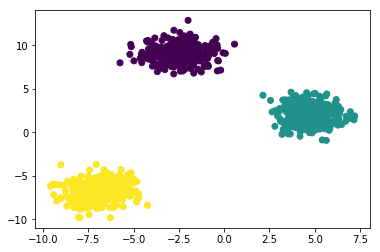

In [49]:
plt.scatter(X[:,0],X[:,1],c=y)

In [53]:
model = Sequential()
layer_1 = Dense(4,activation="relu",input_shape=[2])
layer_2 = Dense(3,activation="softmax")
model.add(layer_1)
model.add(layer_2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 15        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [59]:
model.fit(X_train,y_train,epochs=10,batch_size=30)

Epoch 1/10
670/670 [==============================] - 1s 2ms/step - loss: 1.7923 - acc: 0.2388
Epoch 2/10
670/670 [==============================] - 0s 46us/step - loss: 1.4033 - acc: 0.2940
Epoch 3/10
670/670 [==============================] - 0s 43us/step - loss: 1.0981 - acc: 0.3149
Epoch 4/10
670/670 [==============================] - 0s 46us/step - loss: 0.8709 - acc: 0.5388
Epoch 5/10
670/670 [==============================] - 0s 45us/step - loss: 0.7026 - acc: 0.6776
Epoch 6/10
670/670 [==============================] - 0s 45us/step - loss: 0.5730 - acc: 0.7597
Epoch 7/10
670/670 [==============================] - 0s 47us/step - loss: 0.4731 - acc: 0.8209
Epoch 8/10
670/670 [==============================] - 0s 44us/step - loss: 0.3943 - acc: 0.8776
Epoch 9/10
670/670 [==============================] - 0s 49us/step - loss: 0.3312 - acc: 0.9284
Epoch 10/10
670/670 [==============================] - 0s 47us/step - loss: 0.2818 - acc: 0.9716


In [62]:
model.evaluate(X_test,y_test)

330/330 [==============================] - 0s 343us/step


[0.2711175060633457, 0.9666666666666667]

In [63]:
model.predict(X_test[:1])

array([[0.88303924, 0.09610955, 0.02085119]], dtype=float32)